# Overview:  HW3 - Question 4

In this coding question, you'll implement a classifier with logistic regression
$$ F(w) = \frac{1}{N} \sum_{i=1}^N \log( 1 + e^{-\langle w, x_i \rangle y_i} ). $$

For this problem, I would suggest using functions to prepare the dataset, run gradient descent, and return classification error.  By doing this, you only have to write the code one time and just use the functions to return results for part (4c).

# Loading MNIST Data

In this section, you will learn to load MNIST data.  If you do not have tensorflow available on your jupyter notebook, uncomment the next cell, run it, restart the kernel, and comment the next cell once more.

In [ ]:
#!pip3 install sklearn

In [ ]:
# import statements
import pandas as pd
#import certifi
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
from IPython.display import clear_output
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml

In [ ]:
# this cell will take a minute to run depending on your internet connection
X, y = fetch_openml('mnist_784', version=1, return_X_y=True) # getting data from online
print('X shape:', X.shape, 'y shape:', y.shape)

In [ ]:
# this cell processes some of the data
digits = {j:[] for j in range(10)}
for j in range(len(y)): # takes data assigns it into a dictionary
    digits[int(y[j])].append(X.iloc[j].values.reshape(28,28))
digits = {j:np.stack(digits[j]) for j in range(10)} # stack everything to be one numpy array
for j in range(10):
    print('Shape of data with label', j, ':', digits[j].shape )

# (4a) Plotting

Display one randomly selected image from your training data for each digit class. Provide the index number for each image.

In [ ]:
# plot data here (this should have an output)
import random
import matplotlib.pyplot as plt

images = {}
for i in range(10):
    num_samples = digits[i].shape[0]
    randI = random.randint(0, num_samples - 1)
    imageSelect = digits[i][randI]
    images[i] = (imageSelect, randI)

#plot images
for i, (image, index) in images.items():
    plt.figure(figsize=(2, 2))
    plt.imshow(image, cmap='gray')
    plt.title(f"Digit: {i}, Index: {index}")
    plt.axis('off')
    plt.show()

# (4b) Label data

Select the first 500 examples of 0’s and 1’s for this example, those will form the training data $(x_i , y_i) \in \mathbb{R}^{784} \times \{−1,1\}, i = 1,...,1000$. Assign label $y_i = 1$ for 1s and $y_i = −1$ for 0s.  You can use __np.vectorize__ here.

In [ ]:
# create dataset here (essentially just create a numpy array of 1's and -1's for the labels)
def output_data(num1, num2):
    x_train  = np.concatenate([digits[num1][:500].reshape(500,28*28),
                               digits[num2][:500].reshape(500, 28*28)])
    y_train = np.concatenate([np.ones(500), -1*np.ones(500)]).reshape(1000,1)
    x_test = np.concatenate([digits[num1][500:1000].reshape(500,28*28),
                             digits[num2][500:1000].reshape(500,28*28)])
    maxVal = np.max(x_train)
    y_test = y_train
    return x_train/maxVal, y_train, x_test/maxVal, y_test



# (4bi) Running Gradient Descent

Implement and run a Gradient Descent algorithm, with step-size $\mu = 10^{-4}$, to optimize the function above associated with this setup. You should run your algorithm for at least $T = 10,000$ iterations, but if your computer can handle it try $T=100,000$ or until a reasonable stopping criterion is satisfied.  Provide a plot showing the value of $F(w)$ at each iteration. Also, feel free to adjust $\mu$ to be larger / smaller if the plot does not match your expectations.

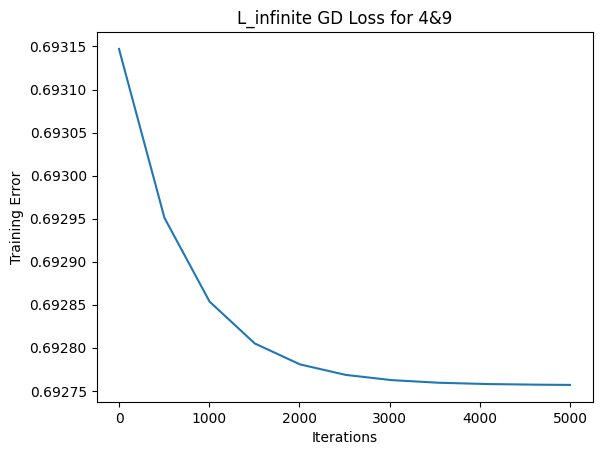

In [22]:
# implement L_infinite gradient descent here

w = np.zeros((784,1))

def gradF(w, x_train, y_train):
    expVal = np.exp(-y_train*(x_train @ w))
    grad = (-expVal/(1+expVal))*y_train*x_train
    return grad.transpose().mean(axis=1).reshape((28*28,1))

def F(w, x_train, y_train):
    F = np.log(1+np.exp(-y_train*(x_train @ w))).mean()
    return F

def p(gradient):
    normGrad = np.linalg.norm(gradient, ord = 1)
    return np.sign(gradient) * normGrad

def gradient_descent(w, T=1000, mu=1e-4, num1=0, num2=1, plot=True):
    x_train, y_train, x_test, y_test = output_data(num1, num2)
    F_history = []
    for t in range(T):
        F_history.append(F(w,x_train, y_train))
        #w = w-mu*gradF(w, x_train, y_train)
        gradient = gradF(w, x_train, y_train)
        w = w-mu*p(gradient)
        if(t%500) == 0:
            print('Finished', t, 'iterations...')
            clear_output(wait=True)
            mu = mu/2
            
    if plot:
        plt.plot(range(T), F_history)
        plt.xlabel('Iterations')
        plt.ylabel('Training Error')
        plt.title('L_infinite GD Loss for '+str(num1)+ '&'+str(num2))

    return w, F_history, x_train, y_train, x_test, y_test

# Call gradient_descent for digits 4 and 9
Tmax = 5000
w_star, F_hist, x_train, y_train, x_test, y_test = gradient_descent(w, T=Tmax, mu=1e-8, num1=4, num2=9, plot=True)


pixelCount 5000.0


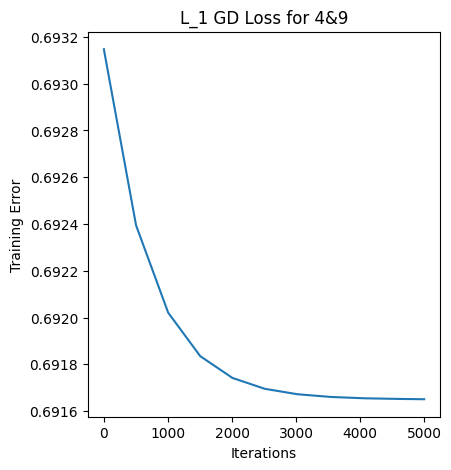

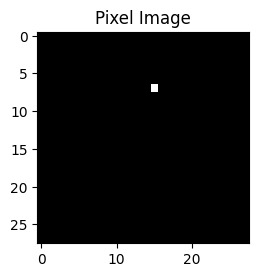

In [34]:
# implement L_1 gradient descent here

w = np.zeros((784,1))
pixelCount = np.zeros(784)

#gradient of F
def gradF(w, x_train, y_train):
    expVal = np.exp(-y_train*(x_train @ w))
    grad = (-expVal/(1+expVal))*y_train*x_train
    return grad.transpose().mean(axis=1).reshape((28*28,1))

#function f
def F(w, x_train, y_train):
    F = np.log(1+np.exp(-y_train*(x_train @ w))).mean()
    return F

#step size
def p(gradient):
    j_star = np.argmax(np.abs(gradient))
    ej_star = np.zeros_like(gradient)
    ej_star[j_star] = 1
    #pixelCount[j_star] += 1
    normGrad = np.linalg.norm(gradient, ord = np.inf)
    return np.sign(gradient*j_star) * normGrad * ej_star



def gradient_descent(w, T=1000, mu=1e-4, num1=0, num2=1, plot=True):
    x_train, y_train, x_test, y_test = output_data(num1, num2)
    F_history = []
    for t in range(T):
        F_history.append(F(w,x_train, y_train))
        #w = w-mu*gradF(w, x_train, y_train)
        gradient = gradF(w, x_train, y_train)
        w = w-mu*p(gradient)
        j_star = np.argmax(np.abs(gradient))
        pixelCount[j_star] += 1
        if(t%500) == 0:
            print('Finished', t, 'iterations...')
            clear_output(wait=True)
            mu = mu/2
            
    if plot:
        plt.figure(figsize = (10,5))
        plt.subplot(121)
        plt.plot(range(T), F_history)
        plt.xlabel('Iterations')
        plt.ylabel('Training Error')
        plt.title('L_1 GD Loss for '+str(num1)+ '&'+str(num2))


    plt.figure(figsize = (6,6))
    plt.subplot(122)
    pixelImage = pixelCount.reshape(28,28)
    plt.imshow(pixelImage, cmap = 'gray')
    plt.title('Pixel Image')
    plt.show

    return w, F_history, x_train, y_train, x_test, y_test
    
# Call gradient_descent for digits 4 and 9
Tmax = 5000
w_star, F_hist, x_train, y_train, x_test, y_test = gradient_descent(w, T=Tmax, mu=1e-4, num1=4, num2=9, plot=True)
sumPixelCount = np.sum(pixelCount)
print('pixelCount', sumPixelCount)

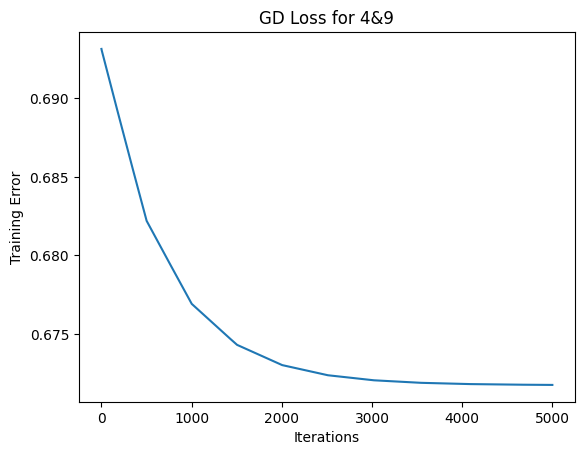

In [21]:
# implement gradient descent here

#w = np.random.normal(size=(784,1))
w = np.zeros((784,1))
#w = np.ones((784,1))

def gradF(w, x_train, y_train):
    expVal = np.exp(-y_train*(x_train @ w))
    grad = (-expVal/(1+expVal))*y_train*x_train
    return grad.transpose().mean(axis=1).reshape((28*28,1))

def F(w, x_train, y_train):
    F = np.log(1+np.exp(-y_train*(x_train @ w))).mean()
    return F

def gradient_descent(w, T=1000, mu=1e-4, num1=0, num2=1, plot=True):
    x_train, y_train, x_test, y_test = output_data(num1, num2)
    F_history = []
    for t in range(T):
        F_history.append(F(w,x_train, y_train))
        w = w-mu*gradF(w, x_train, y_train)
        if(t%500) == 0:
            print('Finished', t, 'iterations...')
            clear_output(wait=True)
            mu = mu/2
            
    if plot:
        plt.plot(range(T), F_history)
        plt.xlabel('Iterations')
        plt.ylabel('Training Error')
        plt.title('GD Loss for '+str(num1)+ '&'+str(num2))

    return w, F_history, x_train, y_train, x_test, y_test

# Call gradient_descent for digits 0 and 1
Tmax = 5000
w_star, F_hist, x_train, y_train, x_test, y_test = gradient_descent(w, T=Tmax, mu=1e-4, num1=4, num2=9, plot=True)

# (4bii) Discussion about gradient descent

Comment on the resulting plot. In particular, does the shape of $F(w)$ suggest you've successfully converged to a local or global minimum?  Does it appear you chose a good stopping criteria?  Explain whether your
answers to these questions are consistent with the theory we discussed in class (and in the
notes). Be specific i.e., point to a specific theorem (or theorems) and indicate
why it does or does not explain the behavior of the algorithm.  Would the theory dictate a different choice of $\mu$ than the one we used?

Put discussion here: F(w)suggests that we are convering on a local minimum since as the curve starts descending rapidly before gradually stabilizing and staying at the stable level for tens of thousands of itertions. This stopping point looks good since the difference between the limit that F(w) approaches between 20k - 50k iterations is pretty much the same, since the graph stabilizes before 10k iterations. This could be changed by updating the mu differently every couple of hundred iterations. However, the way mu is updated in my code every 500 iterations creates a nice smooth curvature without overshooting the target value for the optimal value of w. The trends seen on this graph are what we should expect based on what we have learned about gradient descent in class. A theory that we learned in class that explains this behavior is that as the gradient approaches zero we head towards the local minimum which is shown in the graph. However, it is not always possible to get to that exact point which is why we are not at exactly zero. 

Now, use the $w$ you found from part (a) to classify the first 500 \emph{test} data points associated to
each of the 0 and 1 handwritten digits. Recall that you need to use the function $y = \text{sign}(w^T x)$
to classify. What was the classification error rate associated with the two digits on the test
data (this should be a number between 0 and 1)? What was it on the training data?  Does this relationship make sense?

In [11]:
# Classify and return the classification error

def ClassificationError(w, x, y):
    pred = np.sign(x @ w_star)* y
    error_rate = np.sum(np.array(pred)< 0)/len(pred)
    return pred, error_rate

pred_train, e_rate_train = ClassificationError(w_star, x_train, y_train)
pred_test, e_rate_test = ClassificationError(w_star, x_test, y_test)
print("Training Error rate: ", e_rate_train)
print("Test Error rate: ", e_rate_test)

Training Error rate:  0.212
Test Error rate:  0.219


# (4c) Repeat with 4s and 9s

Repeat parts (b)i. and (b)iii. for digits of 4s and 9s. Comment on the difference between the results and propose a reason as to why the performance did or did not change.

Training Error rate:  0.125
Test Error rate:  0.128


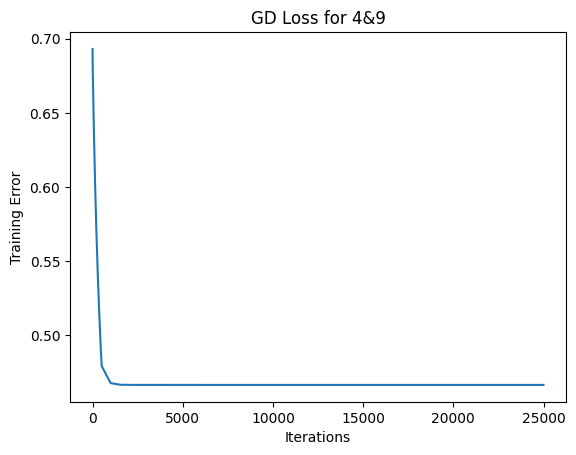

In [12]:
# Repeat here
#w = np.random.normal(size=(784,1))
w = np.zeros((784,1))
#w = np.ones((784,1))
w_star, F_hist, x_train, y_train, x_test, y_test = gradient_descent(w, T=25000, mu=1e-4, num1 =4, num2=9)

pred_train, e_rate_train = ClassificationError(w_star, x_train, y_train)
pred_test, e_rate_test = ClassificationError(w_star, x_test, y_test)
print("Training Error rate: ", e_rate_train)
print("Test Error rate: ", e_rate_test)

In [13]:
#The difference between the performance change could be the w_star value is different comapred to the 0 vs 1 image. Additionally,
#the digits 4 and 9 are more similar than 0 and 1, so it is easier to make mistakes for 4 and 9. This is becasue we store the pixels
# as a single row vector and the values of that vector between 4 and 9 are much more similar than those of 0 and 1, thus leading to 
# a higher error rate